In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('../Datasets/short_data.csv')

In [2]:
# Определение знака зодиака по дню рождения
def get_zodiac_sign(day, month):
    if (month == 12 and day >= 22) or (month == 1 and day <= 19):
        return "Capricorn"
    elif (month == 1 and day >= 20) or (month == 2 and day <= 18):
        return "Aquarius"
    elif (month == 2 and day >= 19) or (month == 3 and day <= 20):
        return "Pisces"
    elif (month == 3 and day >= 21) or (month == 4 and day <= 19):
        return "Aries"
    elif (month == 4 and day >= 20) or (month == 5 and day <= 20):
        return "Taurus"
    elif (month == 5 and day >= 21) or (month == 6 and day <= 20):
        return "Gemini"
    elif (month == 6 and day >= 21) or (month == 7 and day <= 22):
        return "Cancer"
    elif (month == 7 and day >= 23) or (month == 8 and day <= 22):
        return "Leo"
    elif (month == 8 and day >= 23) or (month == 9 and day <= 22):
        return "Virgo"
    elif (month == 9 and day >= 23) or (month == 10 and day <= 22):
        return "Libra"
    elif (month == 10 and day >= 23) or (month == 11 and day <= 21):
        return "Scorpio"
    elif (month == 11 and day >= 22) or (month == 12 and day <= 21):
        return "Sagittarius"

# Добавляем знак зодиака пользователя для проверки одной из гипотез
data['user.birthDate'] = pd.to_datetime(data['user.birthDate'], errors='coerce').dt.tz_localize(None)  # Coerce errors to handle invalid dates
data['user.zodiacSign'] = data['user.birthDate'].apply(lambda x: get_zodiac_sign(x.day, x.month) if pd.notna(x) else None)

data[['user.birthDate', 'user.zodiacSign']].head()


,user.birthDate,user.zodiacSign
0,1976-01-01,Capricorn
1,1997-07-04,Cancer
2,1998-02-06,Aquarius
3,1998-02-24,Pisces
4,1996-11-10,Scorpio


In [3]:
# Расчитаем возраст полльзователя на 10 ноября 2021
reference_date = pd.Timestamp('2021-11-10')

data['user.age'] = (reference_date - data['user.birthDate']).dt.days // 365

data[['user.birthDate', 'user.age']]

,user.birthDate,user.age
0,1976-01-01,45
1,1997-07-04,24
2,1998-02-06,23
3,1998-02-24,23
4,1996-11-10,25
...,...,...
1204,1994-07-18,27
1205,1996-09-19,25
1206,2002-06-07,19
1207,2000-05-09,21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 41 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Unnamed: 0                                          1209 non-null   int64         
 1   __v                                                 1209 non-null   int64         
 2   _id                                                 1209 non-null   object        
 3   conversationsMeta.averageConversationLength         1209 non-null   float64       
 4   conversationsMeta.averageConversationLengthInDays   1209 non-null   float64       
 5   conversationsMeta.longestConversation               1209 non-null   int64         
 6   conversationsMeta.longestConversationInDays         1209 non-null   float64       
 7   conversationsMeta.medianConversationLength          1209 non-null   int64         
 8   conversa

## Исследование полей

Кого больше среди пользователей: мужчин или женщин?

In [5]:
print(data['user.gender'].isna().sum())
print(data['user.gender'].unique())

1
['M' 'F' nan]


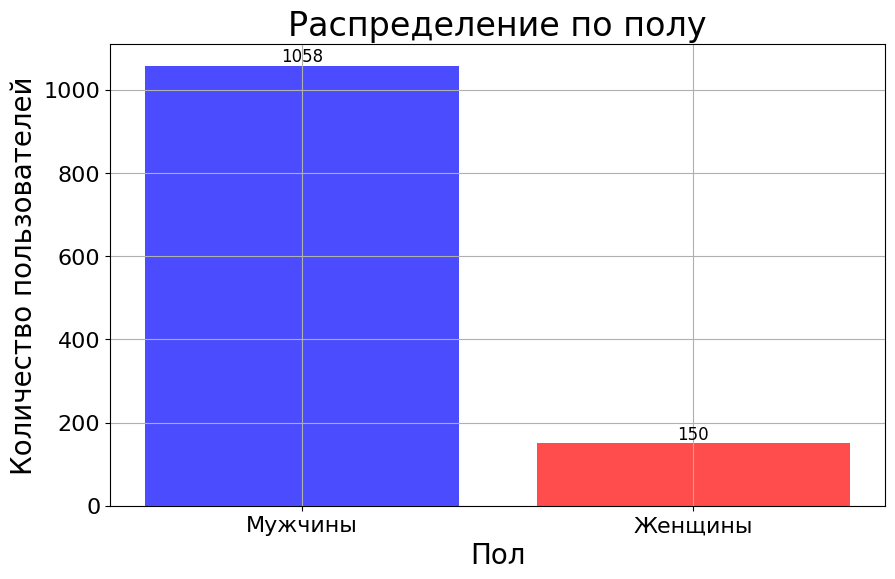

In [6]:
import matplotlib.pyplot as plt

# Построим гистограмму для поля 'user.gender', используя те же цвета
gender_counts = data['user.gender'].value_counts()
labels = ['Мужчины' if x == 'M' else 'Женщины' for x in gender_counts.index]
colors = ['blue' if x == 'M' else 'red' for x in gender_counts.index]

# Визуализация
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, gender_counts, alpha=0.7, color=colors)
plt.title('Распределение по полу', fontsize=24)
plt.xlabel('Пол', fontsize=20)
plt.ylabel('Количество пользователей', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)

# Добавляем значения на столбцы
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=12, color='black')

plt.show()


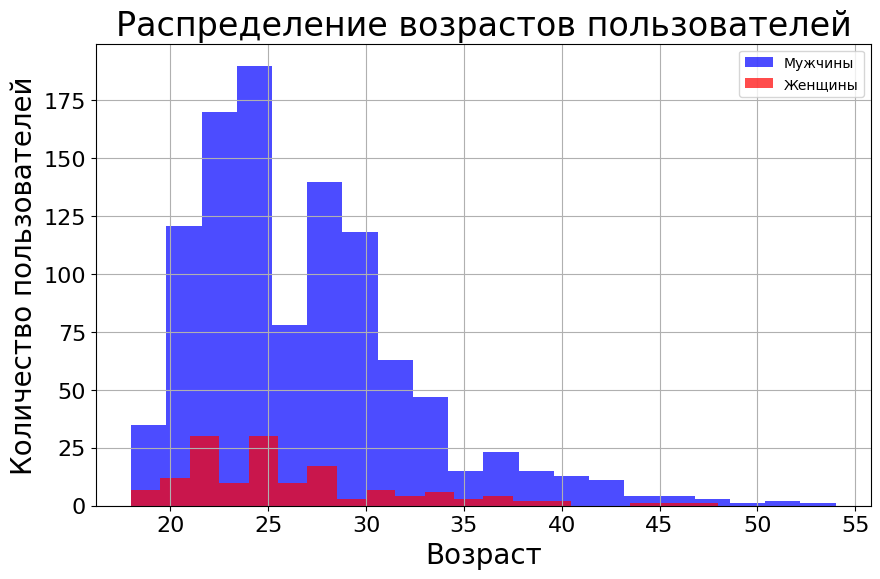

In [7]:
# Создаем гистограмму для мужчин и женщин с разными цветами
male_data = data[data['user.gender'] == 'M']['user.age']
female_data = data[data['user.gender'] == 'F']['user.age']
plt.figure(figsize=(10, 6))
plt.hist(male_data[(male_data > 10) & (male_data < 60)], bins=20, alpha=0.7, label='Мужчины', color='blue')
plt.hist(female_data[(female_data > 10) & (female_data < 60)], bins=20, alpha=0.7, label='Женщины', color='red')

# Добавляем название графика и осей
plt.title('Распределение возрастов пользователей', fontsize=24)
plt.xlabel('Возраст', fontsize=20)
plt.ylabel('Количество пользователей', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)
plt.legend()
plt.show()


In [8]:
print('Средний возраст мужчин', np.mean(male_data))
print('Медианный возраст мужчин', np.median(male_data))
print('Средний возраст женщин', np.mean(female_data))
print('Медианный возраст женщин', np.median(female_data))

Средний возраст мужчин 26.99905482041588
Медианный возраст мужчин 26.0
Средний возраст женщин 25.893333333333334
Медианный возраст женщин 25.0


In [9]:
from scipy.stats import mannwhitneyu

# Тест Манна-Уитни
mw_stat, mw_p = mannwhitneyu(male_data.dropna(), female_data.dropna())

print(f"Результат теста Манна-Уитни: статистика={mw_stat:.2f}, p-value={mw_p:.4f}")


Результат теста Манна-Уитни: статистика=88943.50, p-value=0.0162


У кого больше совпадений?

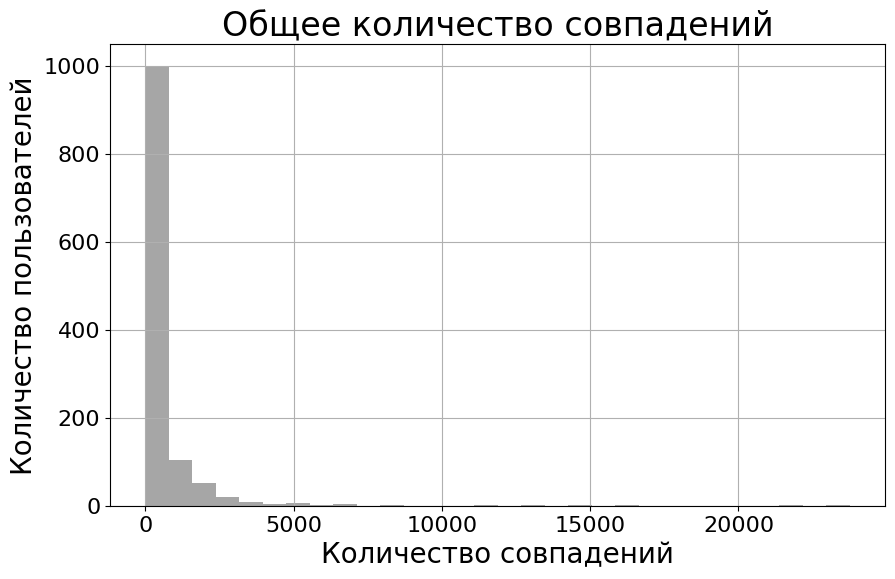

In [10]:
total_matches = data['Total_matches']

# Визуализация гистограммы для всех пользователей
plt.figure(figsize=(10, 6))
plt.hist(total_matches, bins=30, color='gray', alpha=0.7)
plt.title('Общее количество совпадений', fontsize=24)
plt.xlabel('Количество совпадений', fontsize=20)
plt.ylabel('Количество пользователей', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)
plt.show()


Видно, что больше 5000 рассматривать не имеет смысла

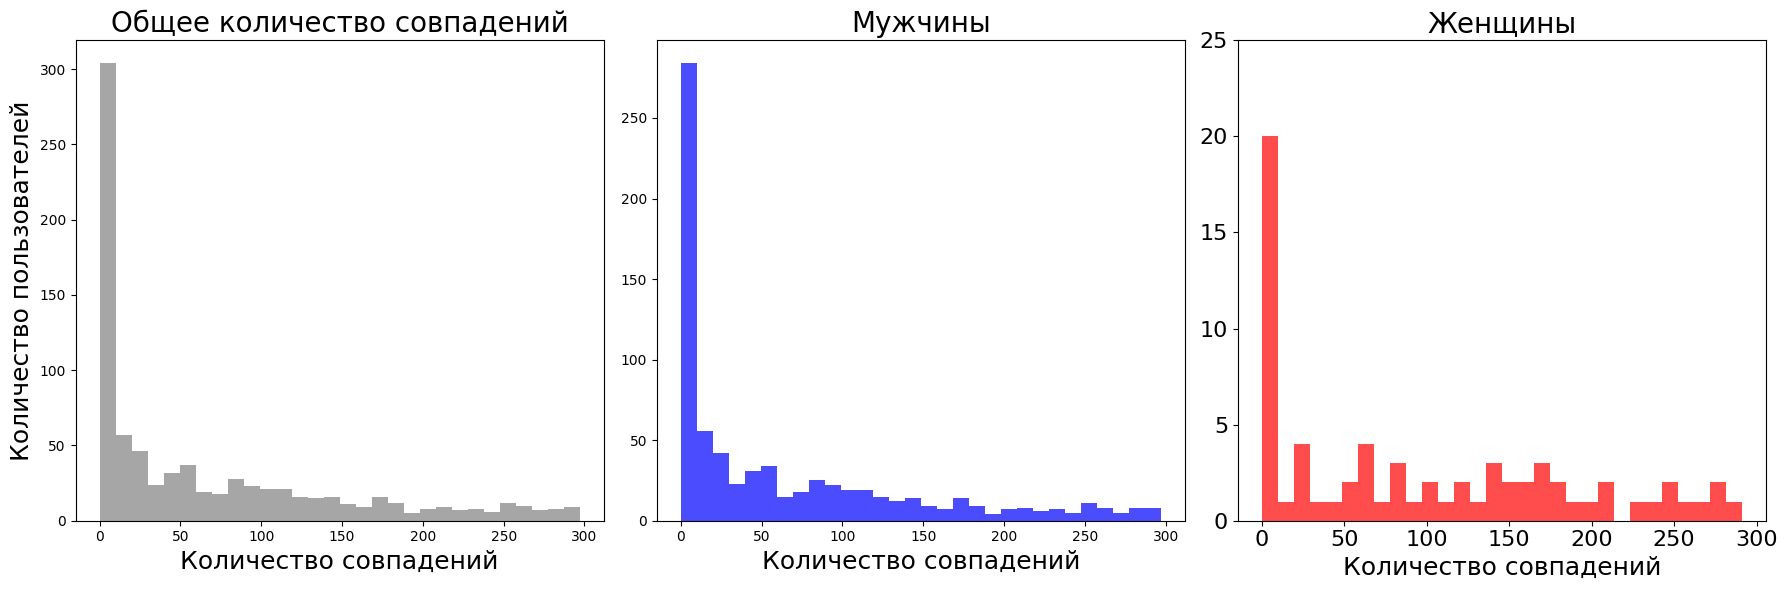

In [11]:
# Фильтрация данных по полу
male_data = data[data['user.gender'] == 'M']['Total_matches']
female_data = data[data['user.gender'] == 'F']['Total_matches']

male_data = male_data[male_data <= 300]
female_data = female_data[female_data <= 300]

# Общие данные
total_matches_data = data['Total_matches']
total_matches_data = total_matches_data[total_matches_data <= 300]

# Создание фигуры и осей для 3 гистограмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Гистограмма для всех пользователей
axes[0].hist(total_matches_data, bins=30, color='gray', alpha=0.7)
axes[0].set_title('Общее количество совпадений', fontsize=20)
axes[0].set_xlabel('Количество совпадений', fontsize=18)
axes[0].set_ylabel('Количество пользователей', fontsize=18)

# Гистограмма для мужчин
axes[1].hist(male_data, bins=30, color='blue', alpha=0.7)
axes[1].set_title('Мужчины', fontsize=20)
axes[1].set_xlabel('Количество совпадений', fontsize=18)

# Гистограмма для женщин
axes[2].hist(female_data, bins=30, color='red', alpha=0.7)
axes[2].set_title('Женщины', fontsize=20)
axes[2].set_xlabel('Количество совпадений', fontsize=18)
axes[2].set_ylim(0, 25)

# Отображение гистограмм
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.show()


In [12]:
print('Среднее количество совпадений у мужчин', np.mean(male_data))
print('Медианное количество совпадений у мужчин', np.median(male_data))
print('Среднее количество совпадений у женщин', np.mean(female_data))
print('Медианное количество совпадений у женщин', np.median(female_data))

Среднее количество совпадений у мужчин 64.04026845637584
Медианное количество совпадений у мужчин 27.0
Среднее количество совпадений у женщин 96.40579710144928
Медианное количество совпадений у женщин 80.0


Кто чаще пишет сообщения?

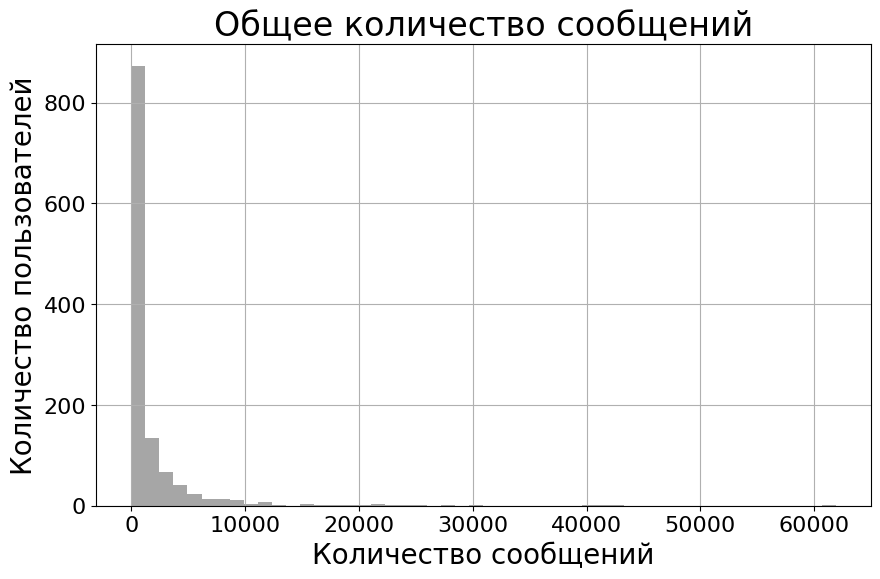

In [13]:
total_matches = data['Total_messagesSent']

# Визуализация гистограммы для всех пользователей
plt.figure(figsize=(10, 6))
plt.hist(total_matches, bins=50, color='gray', alpha=0.7)
plt.title('Общее количество сообщений', fontsize=24)
plt.xlabel('Количество сообщений', fontsize=20)
plt.ylabel('Количество пользователей', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True)
plt.show()


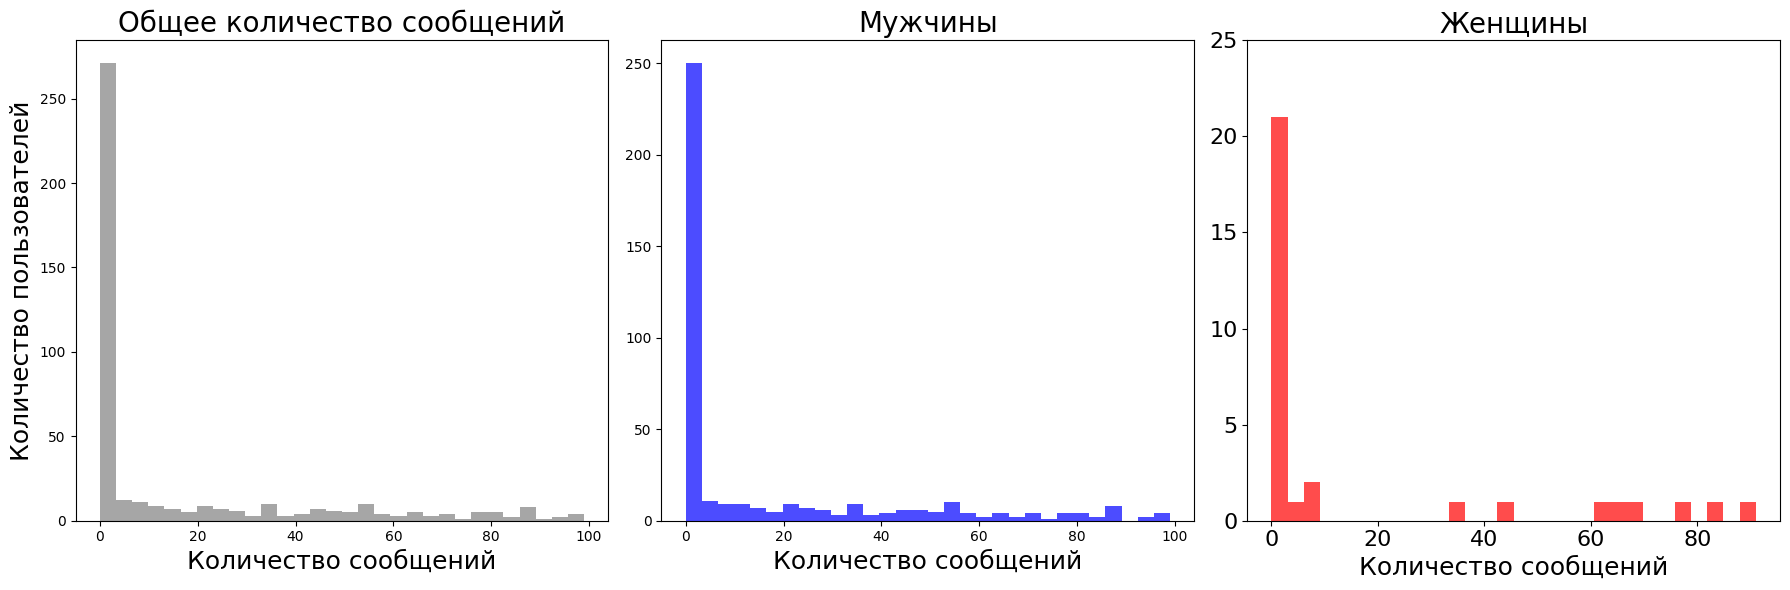

In [14]:
# Фильтрация данных по полу
male_data = data[data['user.gender'] == 'M']['Total_messagesSent']
female_data = data[data['user.gender'] == 'F']['Total_messagesSent']

male_data = male_data[male_data <= 100]
female_data = female_data[female_data <= 100]

# Общие данные
total_matches_data = data['Total_messagesSent']
total_matches_data = total_matches_data[total_matches_data <= 100]

# Создание фигуры и осей для 3 гистограмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Гистограмма для всех пользователей
axes[0].hist(total_matches_data, bins=30, color='gray', alpha=0.7)
axes[0].set_title('Общее количество сообщений', fontsize=20)
axes[0].set_xlabel('Количество сообщений', fontsize=18)
axes[0].set_ylabel('Количество пользователей', fontsize=18)

# Гистограмма для мужчин
axes[1].hist(male_data, bins=30, color='blue', alpha=0.7)
axes[1].set_title('Мужчины', fontsize=20)
axes[1].set_xlabel('Количество сообщений', fontsize=18)

# Гистограмма для женщин
axes[2].hist(female_data, bins=30, color='red', alpha=0.7)
axes[2].set_title('Женщины', fontsize=20)
axes[2].set_xlabel('Количество сообщений', fontsize=18)
axes[2].set_ylim(0, 25)

# Отображение гистограмм
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.show()


Кто чаще заходит в приложение?

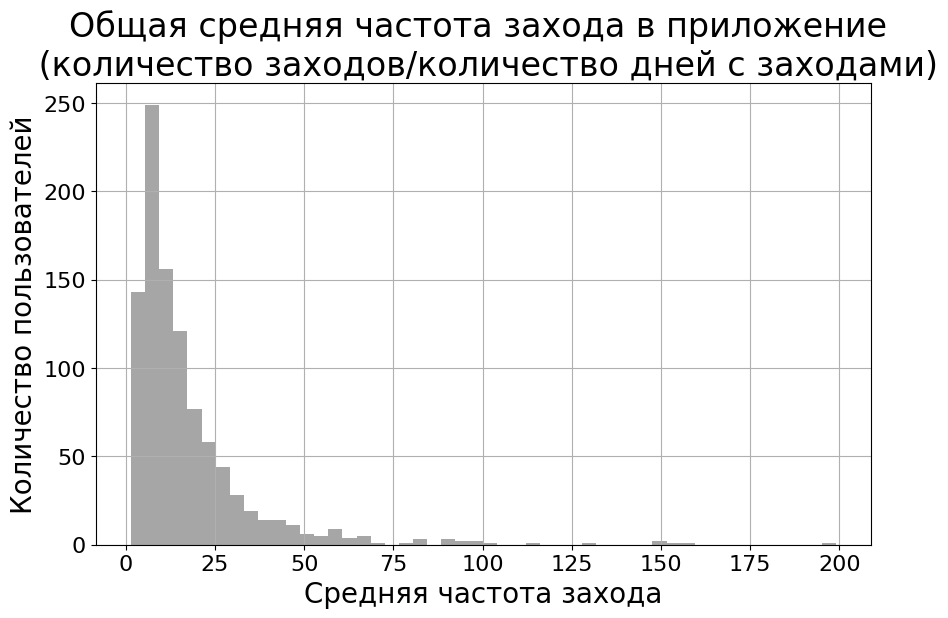

In [15]:
total_matches = data['Total_appOpens'] / data['DaysWith_appOpens']

# Визуализация гистограммы для всех пользователей
plt.figure(figsize=(10, 6))
plt.hist(total_matches, bins=50, color='gray', alpha=0.7)
plt.title('Общая средняя частота захода в приложение \n (количество заходов/количество дней с заходами)', fontsize=24)
plt.xlabel('Средняя частота захода', fontsize=20)
plt.ylabel('Количество пользователей', fontsize=20)
plt.grid(True)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

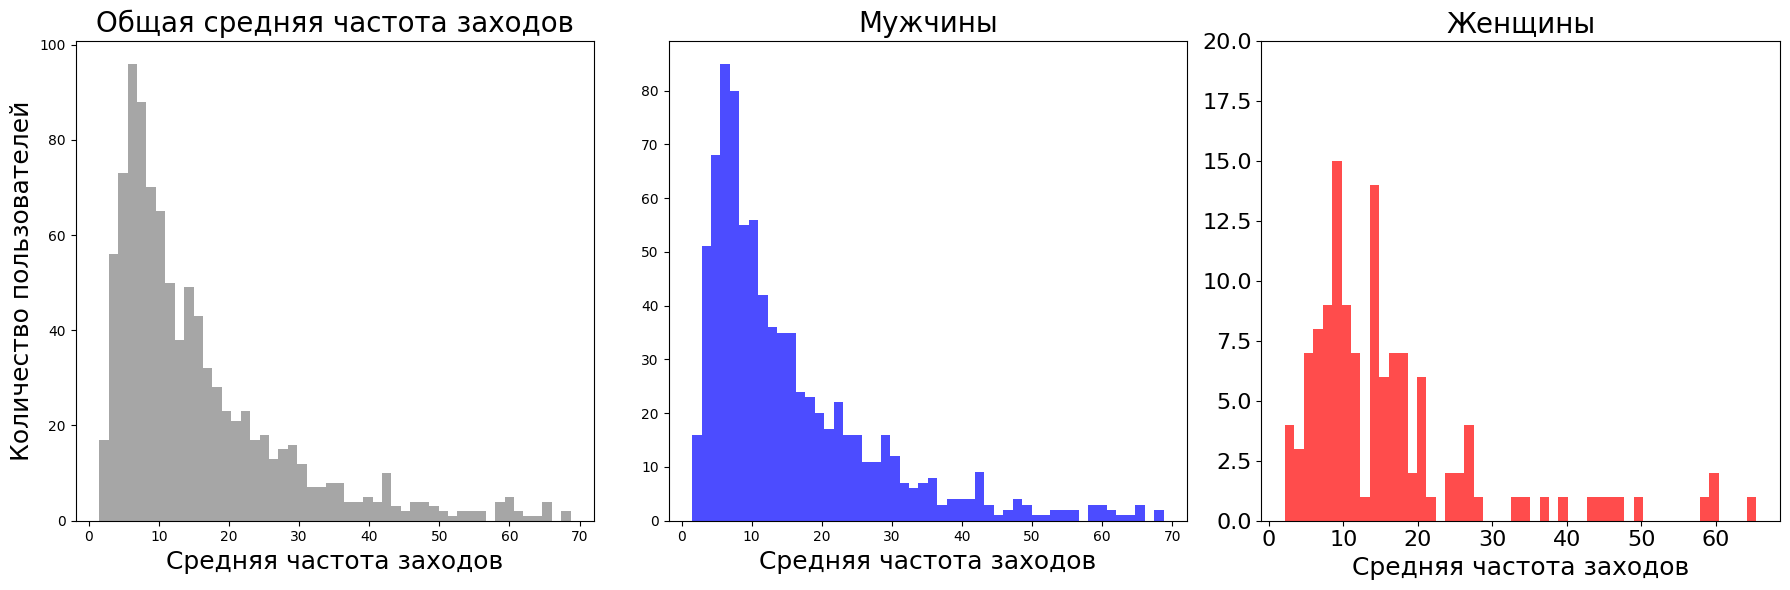

In [16]:
# Фильтрация данных по полу
male_data = data[data['user.gender'] == 'M']['Total_appOpens'] / data[data['user.gender'] == 'M']['DaysWith_appOpens']
female_data = data[data['user.gender'] == 'F']['Total_appOpens'] / data[data['user.gender'] == 'F']['DaysWith_appOpens']

male_data = male_data[male_data <= 75]
female_data = female_data[female_data <= 75]

# Общие данные
total_matches_data = data['Total_appOpens'] / data['DaysWith_appOpens']
total_matches_data = total_matches_data[total_matches_data <= 75]

# Создание фигуры и осей для 3 гистограмм
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Гистограмма для всех пользователей
axes[0].hist(total_matches_data, bins=50, color='gray', alpha=0.7)
axes[0].set_title('Общая средняя частота заходов', fontsize=20)
axes[0].set_xlabel('Средняя частота заходов', fontsize=18)
axes[0].set_ylabel('Количество пользователей', fontsize=18)

# Гистограмма для мужчин
axes[1].hist(male_data, bins=50, color='blue', alpha=0.7)
axes[1].set_title('Мужчины', fontsize=20)
axes[1].set_xlabel('Средняя частота заходов', fontsize=18)

# Гистограмма для женщин
axes[2].hist(female_data, bins=50, color='red', alpha=0.7)
axes[2].set_title('Женщины', fontsize=20)
axes[2].set_xlabel('Средняя частота заходов', fontsize=18)
axes[2].set_ylim(0, 20)

# Отображение гистограмм
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.show()


In [17]:
print('Среднее количество заходов в приложение у мужчин', np.mean(male_data))
print('Медианное количество заходов в приложение у мужчин', np.median(male_data))
print('Среднее количество заходов в приложение у женщин', np.mean(female_data))
print('Медианное количество заходов в приложение у женщин', np.median(female_data))

Среднее количество заходов в приложение у мужчин 15.439663929666562
Медианное количество заходов в приложение у мужчин 11.104377104377104
Среднее количество заходов в приложение у женщин 16.211374372762258
Медианное количество заходов в приложение у женщин 13.666360294117647


## Есть ли нормально распределённые данные?

In [18]:
import scipy.stats as stats

# Список столбцов для проверки на нормальность
selected_columns = ['conversationsMeta.averageConversationLength',
           'conversationsMeta.averageConversationLengthInDays',
           'conversationsMeta.longestConversation',
           'conversationsMeta.longestConversationInDays',
           'conversationsMeta.medianConversationLength',
           'conversationsMeta.medianConversationLengthInDays',
           'conversationsMeta.nrOfConversations',
           'conversationsMeta.nrOfGhostingsAfterInitialMessage',
           'conversationsMeta.nrOfOneMessageConversations',
           'conversationsMeta.percentOfOneMessageConversations',
           'Total_appOpens', 'DaysWith_appOpens', 'Total_matches',
           'DaysWith_matches', 'Total_messagesReceived',
           'DaysWith_messagesReceived', 'Total_messagesSent',
           'DaysWith_messagesSent', 'Total_swipeLikes', 'DaysWith_swipeLikes',
           'Total_swipePasses', 'DaysWith_swipePasses']

# Функция для выполнения тестов на нормальность
def normality_tests(series):
    results = {}
    shapiro_test = stats.shapiro(series)
    d_agostino_test = stats.normaltest(series)
    anderson_test = stats.anderson(series, dist='norm')
    
    # Сбор результатов
    results['shapiro'] = shapiro_test[1] > 0.05  # Истина, если распределение нормальное
    results['d_agostino'] = d_agostino_test[1] > 0.05  # Истина, если распределение нормальное
    results['anderson'] = all([cv > anderson_test.statistic for cv in anderson_test.critical_values])
    
    # Если все тесты согласны с нормальностью
    if results['shapiro'] and results['d_agostino'] and results['anderson']:
        return True
    else:
        return False

# Словарь для хранения результатов
normal_columns = []

# Применение тестов
for col in selected_columns:
    if normality_tests(data[col]):
        normal_columns.append(col)

normal_columns


[]

##### Вывод: среди данных нет распределённых нормально

## Поиск линейных зависимостей 

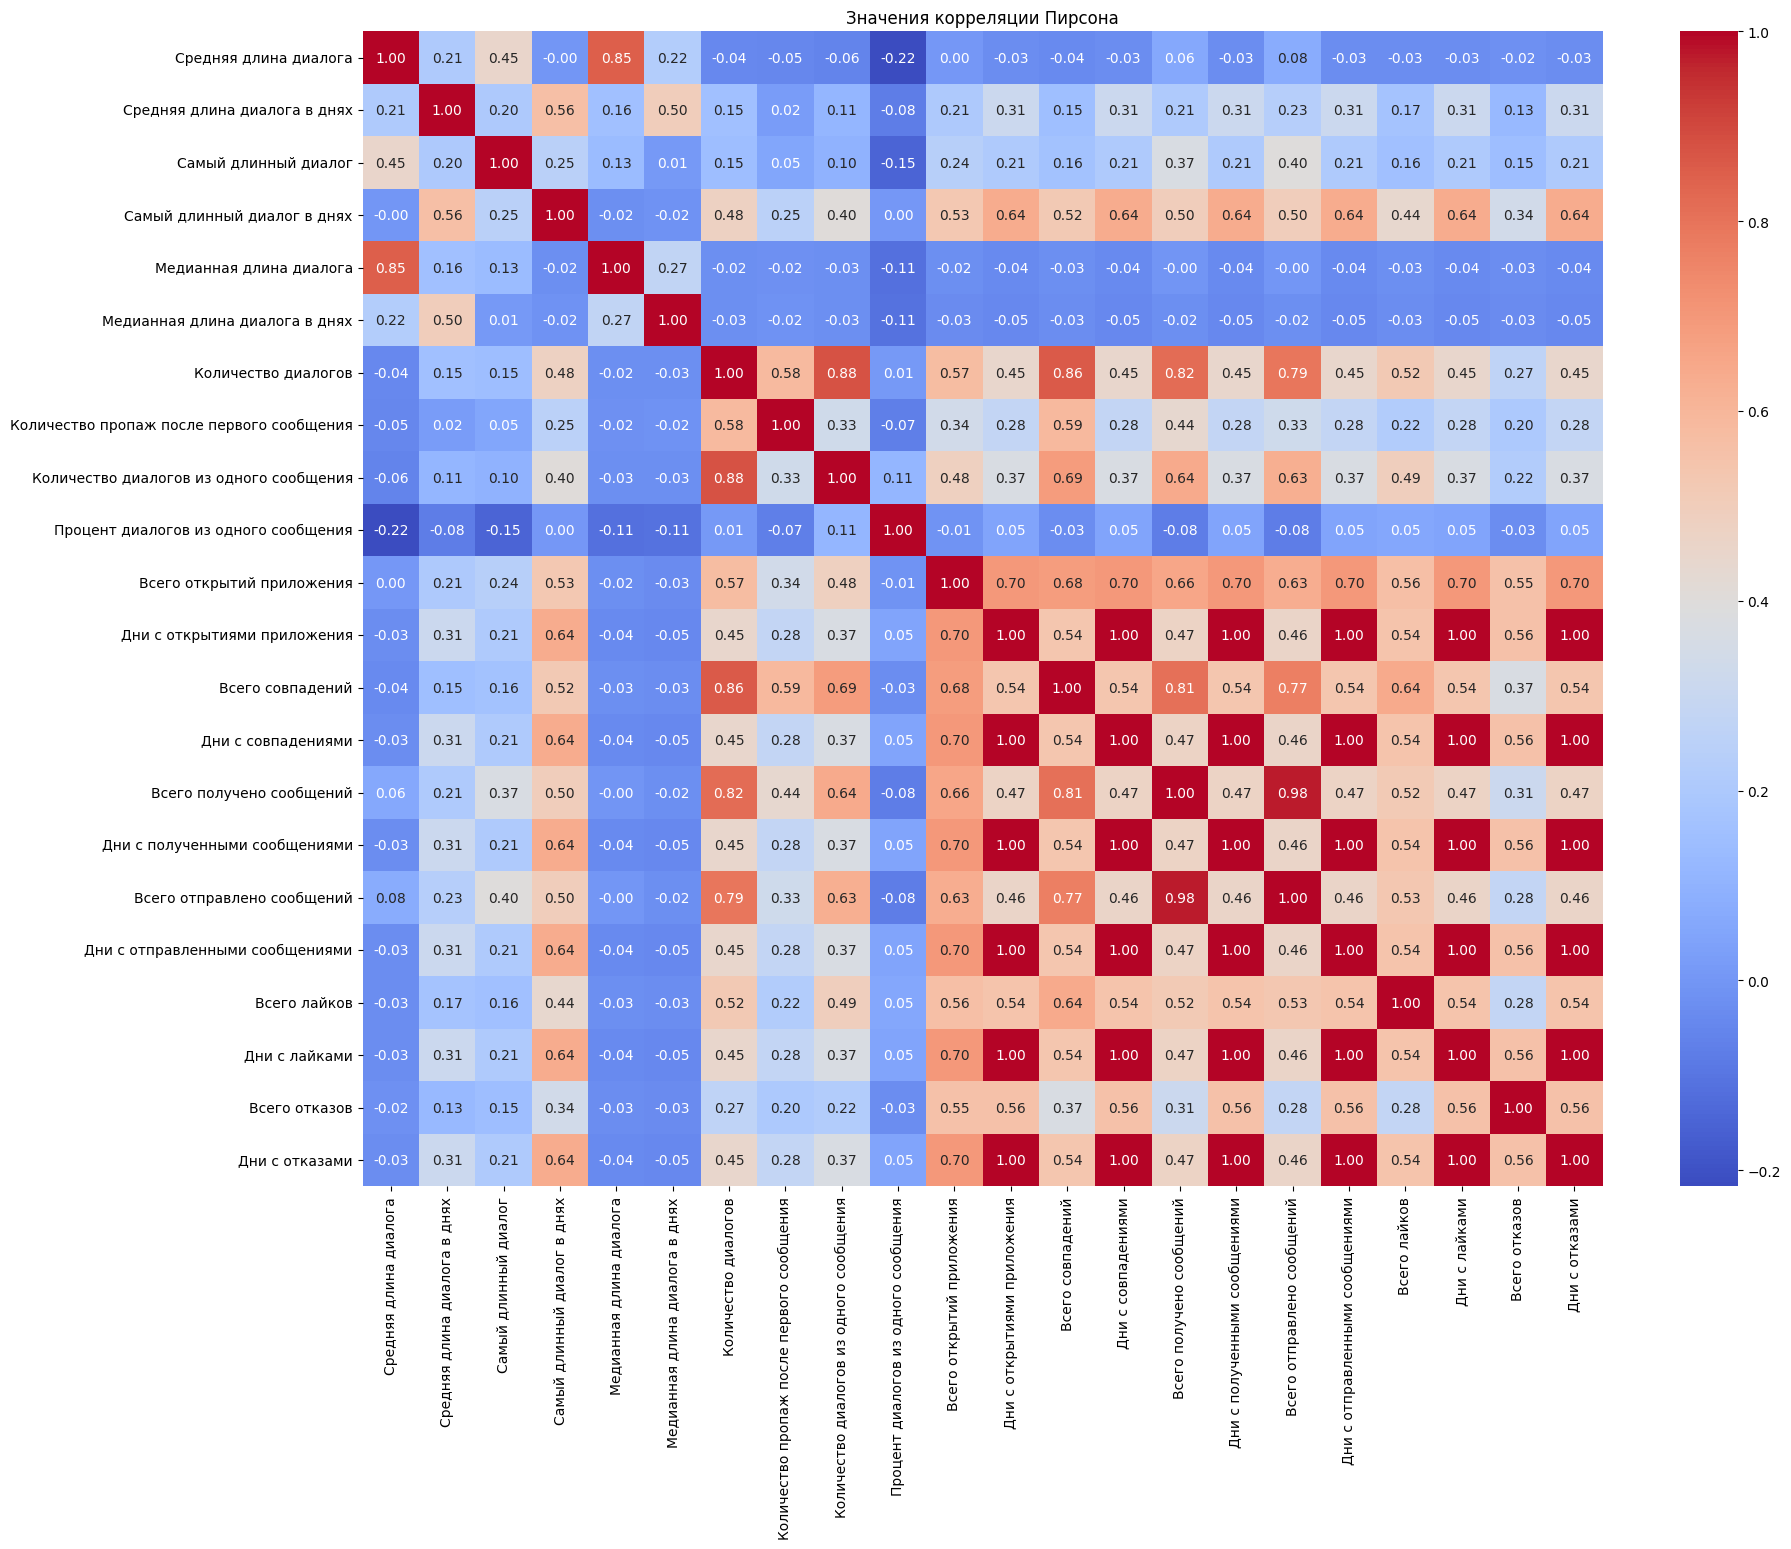

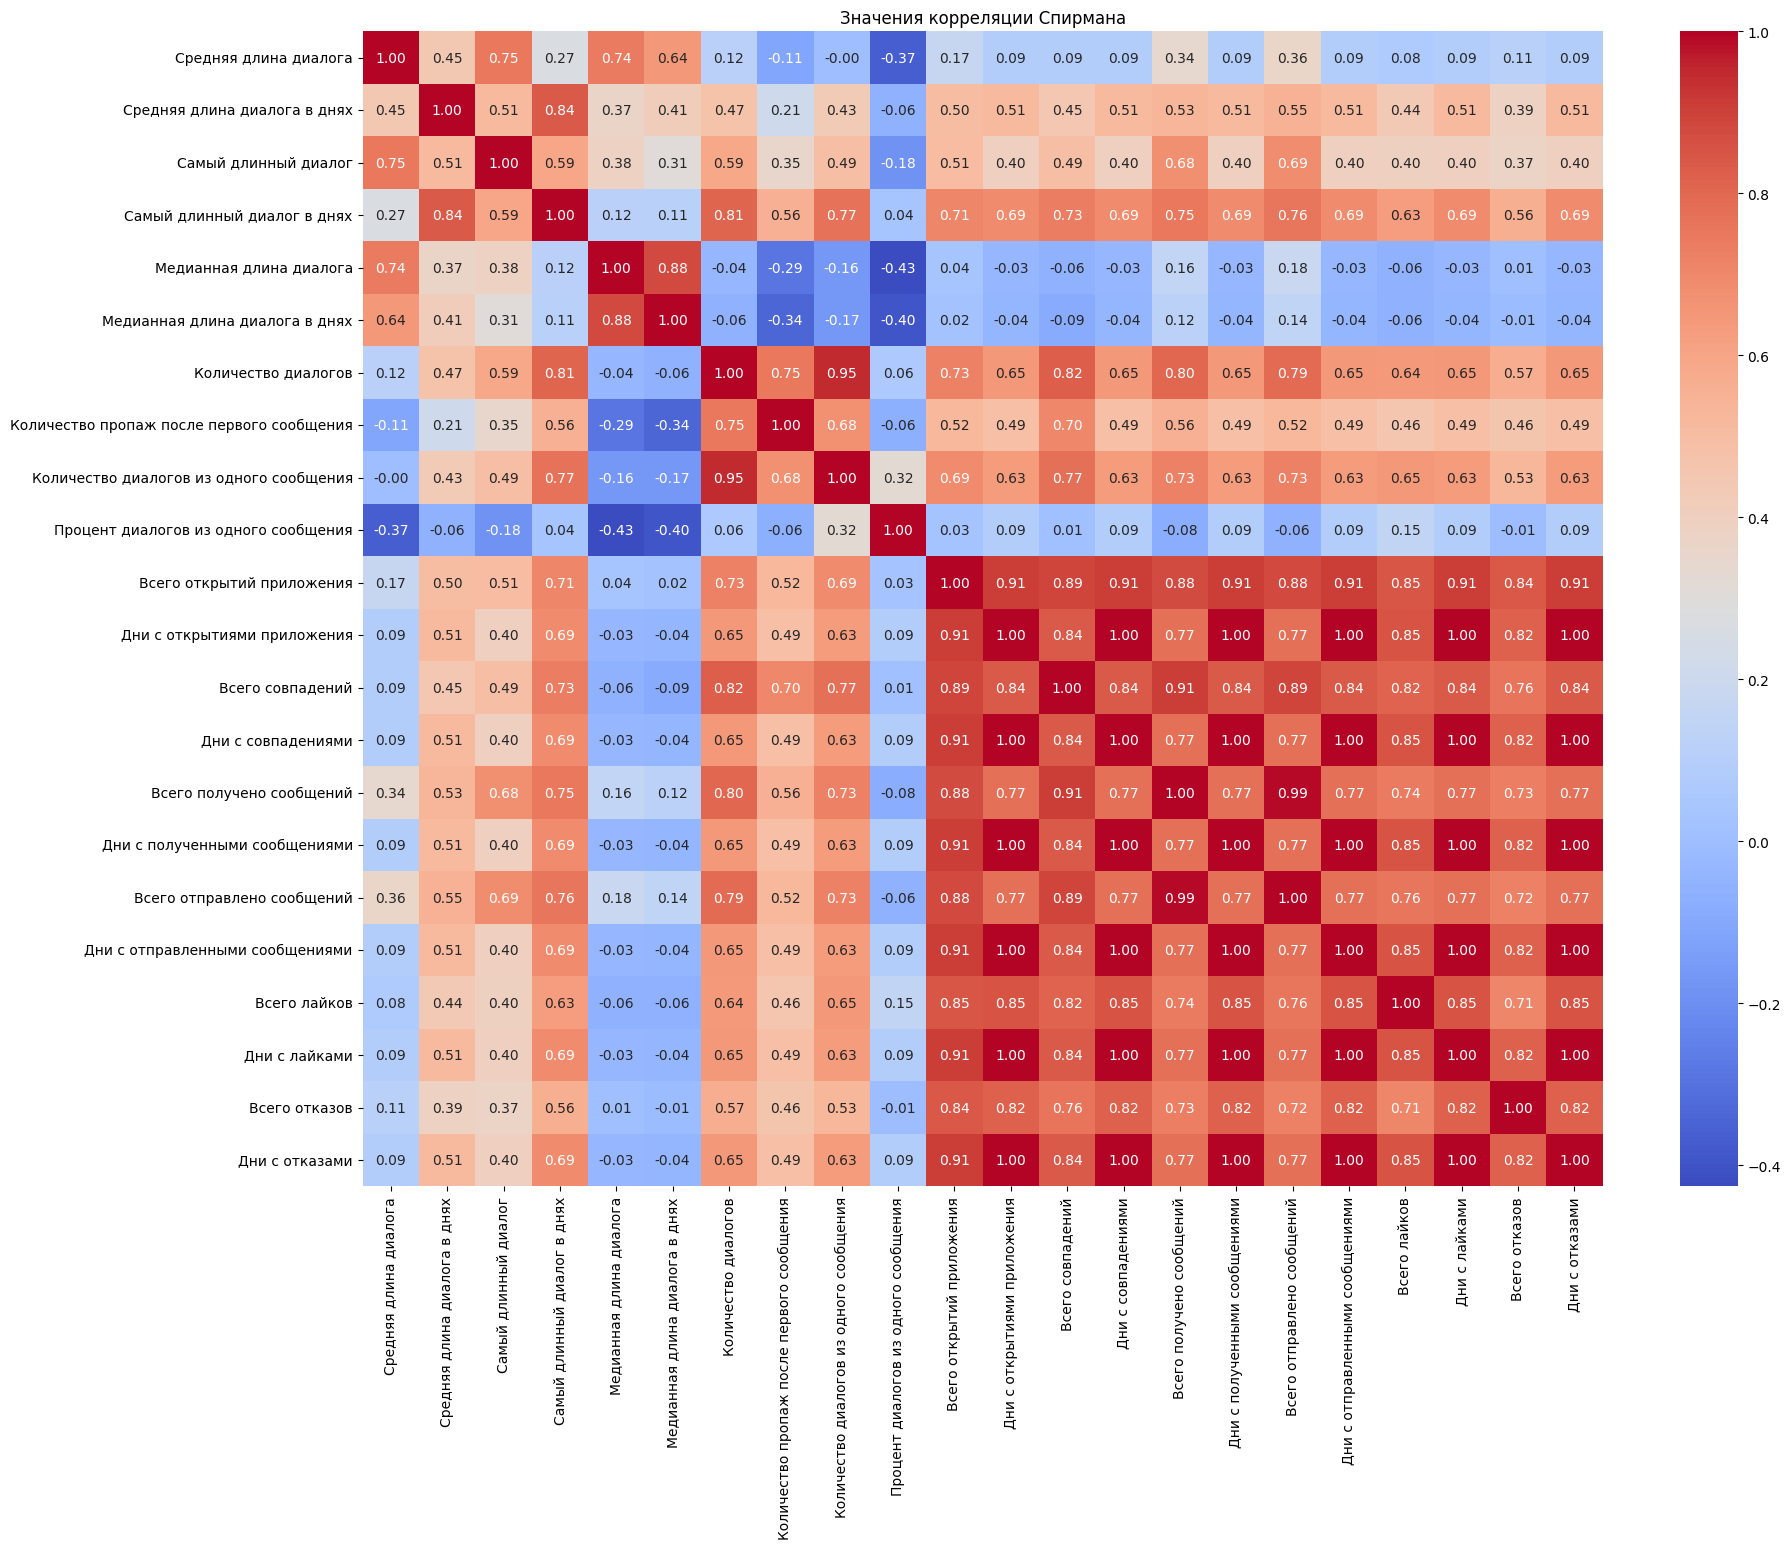

In [19]:
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Словарь для перевода на русский
column_translations = {
    'conversationsMeta.averageConversationLength': 'Средняя длина диалога',
    'conversationsMeta.averageConversationLengthInDays': 'Средняя длина диалога в днях',
    'conversationsMeta.longestConversation': 'Самый длинный диалог',
    'conversationsMeta.longestConversationInDays': 'Самый длинный диалог в днях',
    'conversationsMeta.medianConversationLength': 'Медианная длина диалога',
    'conversationsMeta.medianConversationLengthInDays': 'Медианная длина диалога в днях',
    'conversationsMeta.nrOfConversations': 'Количество диалогов',
    'conversationsMeta.nrOfGhostingsAfterInitialMessage': 'Количество пропаж после первого сообщения',
    'conversationsMeta.nrOfOneMessageConversations': 'Количество диалогов из одного сообщения',
    'conversationsMeta.percentOfOneMessageConversations': 'Процент диалогов из одного сообщения',
    'Total_appOpens': 'Всего открытий приложения',
    'DaysWith_appOpens': 'Дни с открытиями приложения',
    'Total_matches': 'Всего совпадений',
    'DaysWith_matches': 'Дни с совпадениями',
    'Total_messagesReceived': 'Всего получено сообщений',
    'DaysWith_messagesReceived': 'Дни с полученными сообщениями',
    'Total_messagesSent': 'Всего отправлено сообщений',
    'DaysWith_messagesSent': 'Дни с отправленными сообщениями',
    'Total_swipeLikes': 'Всего лайков',
    'DaysWith_swipeLikes': 'Дни с лайками',
    'Total_swipePasses': 'Всего отказов',
    'DaysWith_swipePasses': 'Дни с отказами'
}


# Создание DataFrame только с выбранными колонками
data_selected = data[selected_columns]

# Вычисление матрицы корреляций Пирсона и Спирмана
pearson_corr = data_selected.corr(method='pearson')
spearman_corr = data_selected.corr(method='spearman')

# Вычисление p-values для корреляций Пирсона и Спирмана
def calculate_corr_values(df, method):
    corr_values = pd.DataFrame(index=df.columns, columns=df.columns)
    for col in df.columns:
        for row in df.columns:
            if method == 'pearson':
                p, _ = pearsonr(df[col], df[row])
            else:
                p, _ = spearmanr(df[col], df[row])
            corr_values.at[col, row] = p
    return corr_values.astype(float)

pearson_corr_values = calculate_corr_values(data_selected, 'pearson')
spearman_corr_values = calculate_corr_values(data_selected, 'spearman')

# Переименование колонок в DataFrame значений корреляции для лучшего восприятия
pearson_corr_values = pearson_corr_values.rename(columns=column_translations, index=column_translations)
spearman_corr_values = spearman_corr_values.rename(columns=column_translations, index=column_translations)


# Функция для отображения тепловой карты значений корреляции
def plot_heatmap(df, title):
    plt.figure(figsize=(20, 15))
    sns.heatmap(df, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.title(title)
    plt.show()

# Отображение тепловых карт значений корреляции
plot_heatmap(pearson_corr_values, "Значения корреляции Пирсона")
plot_heatmap(spearman_corr_values, "Значения корреляции Спирмана")


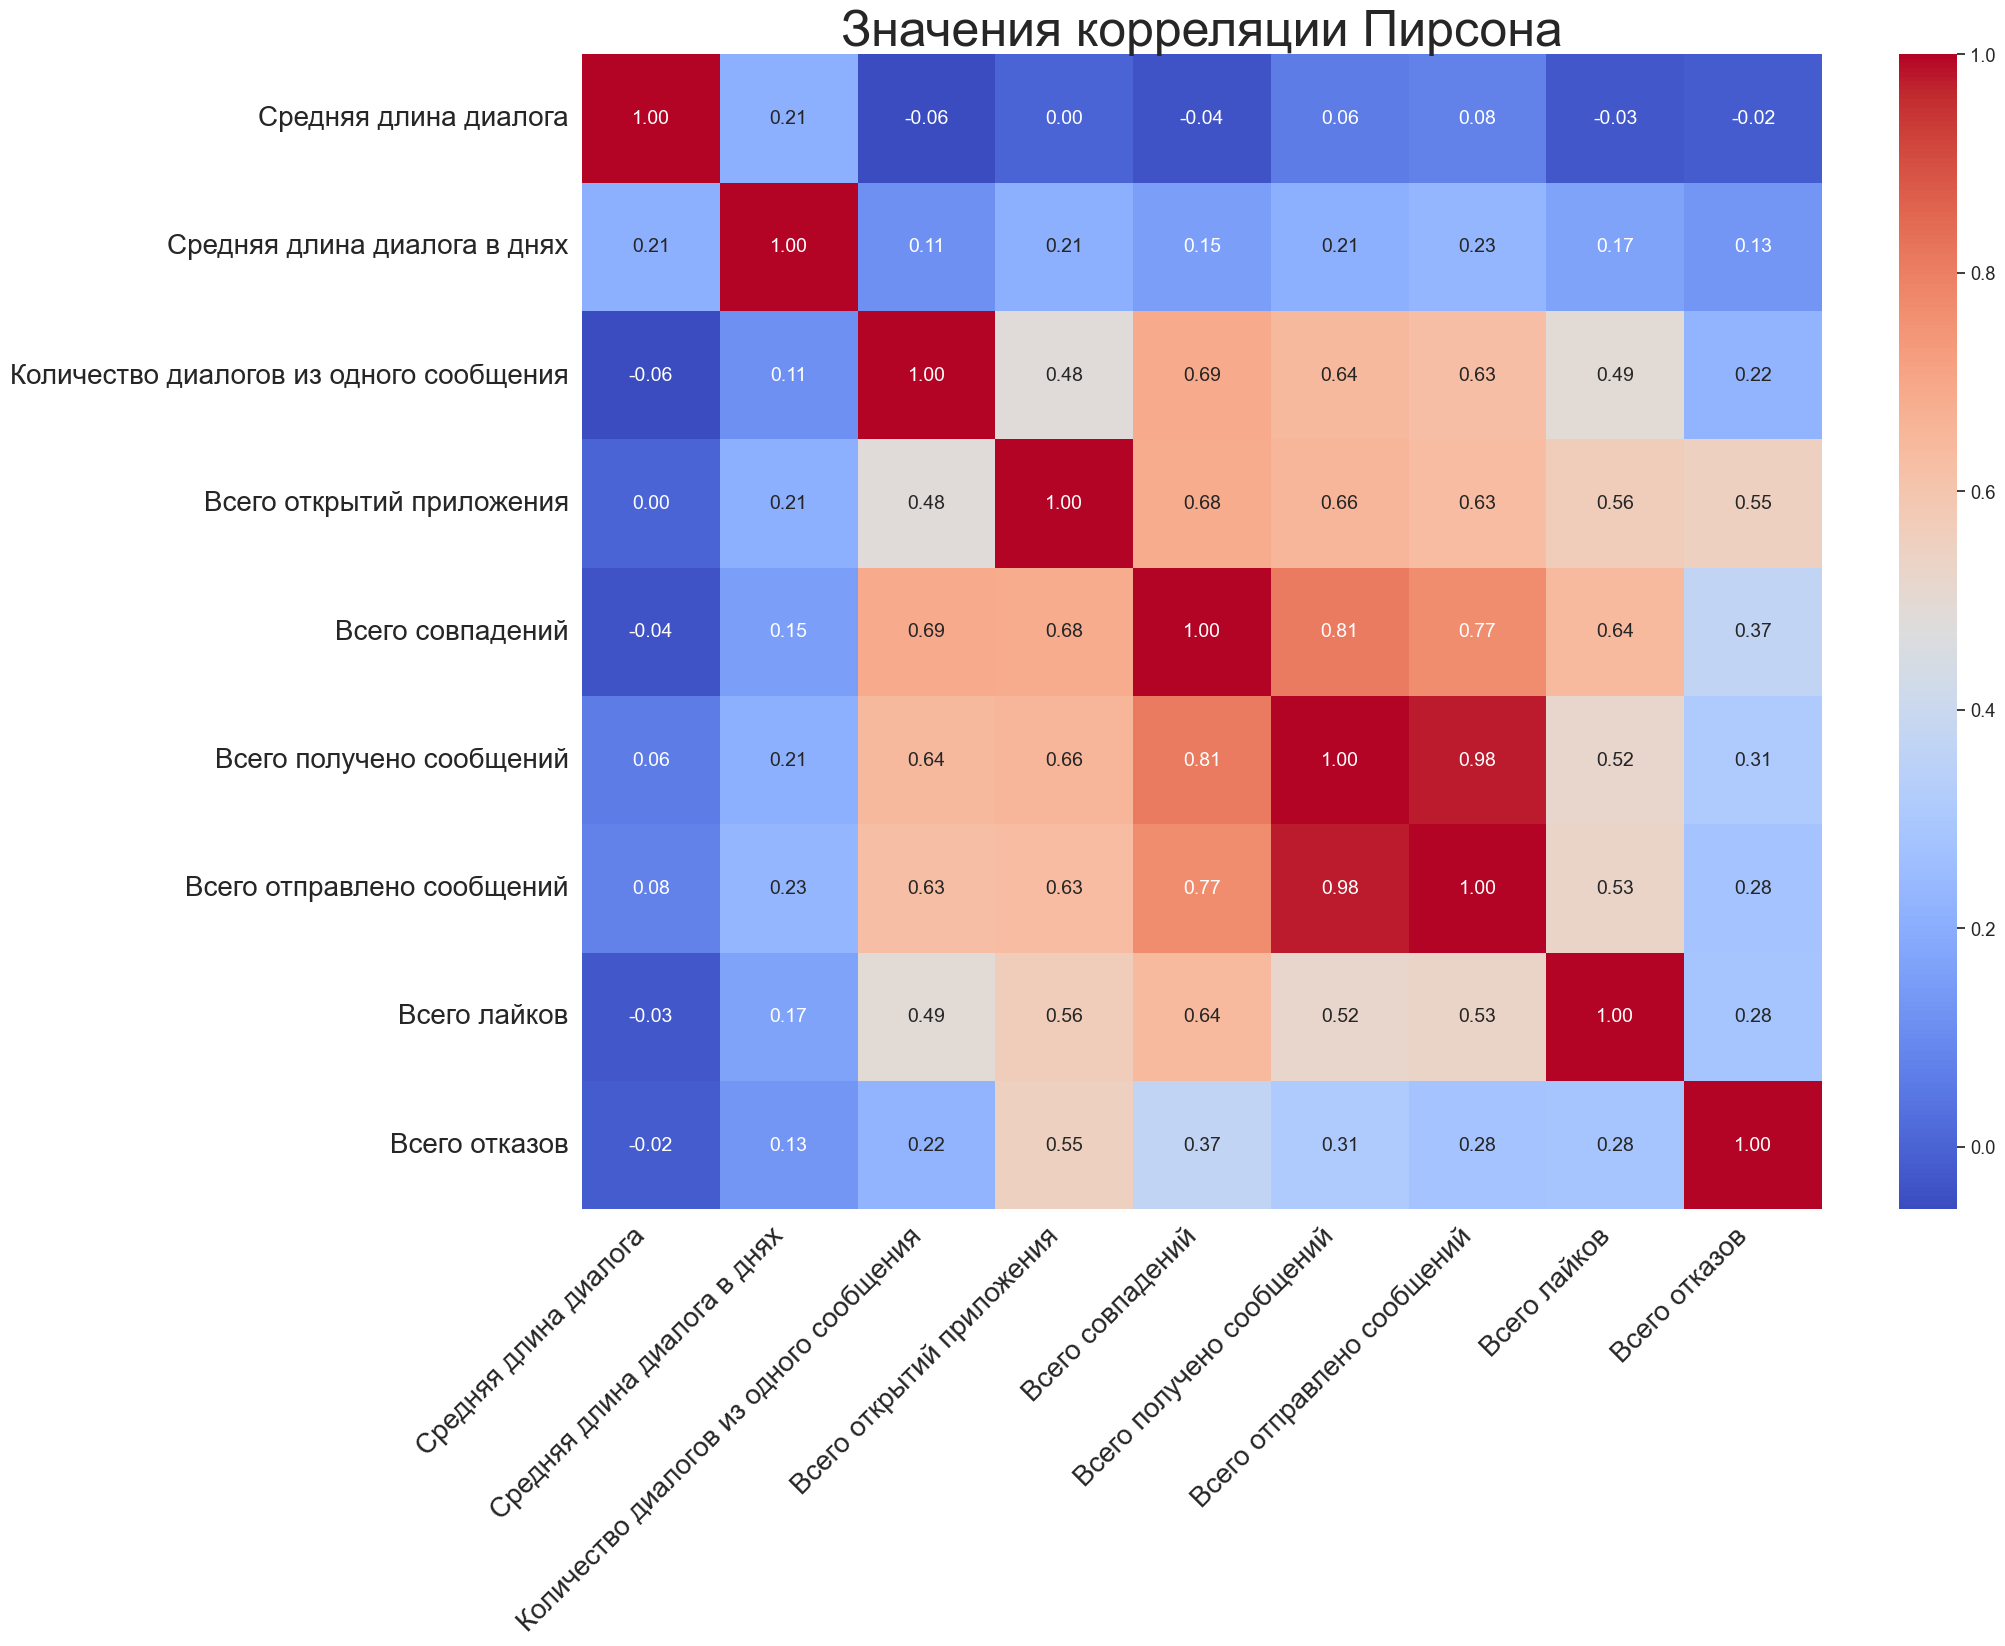

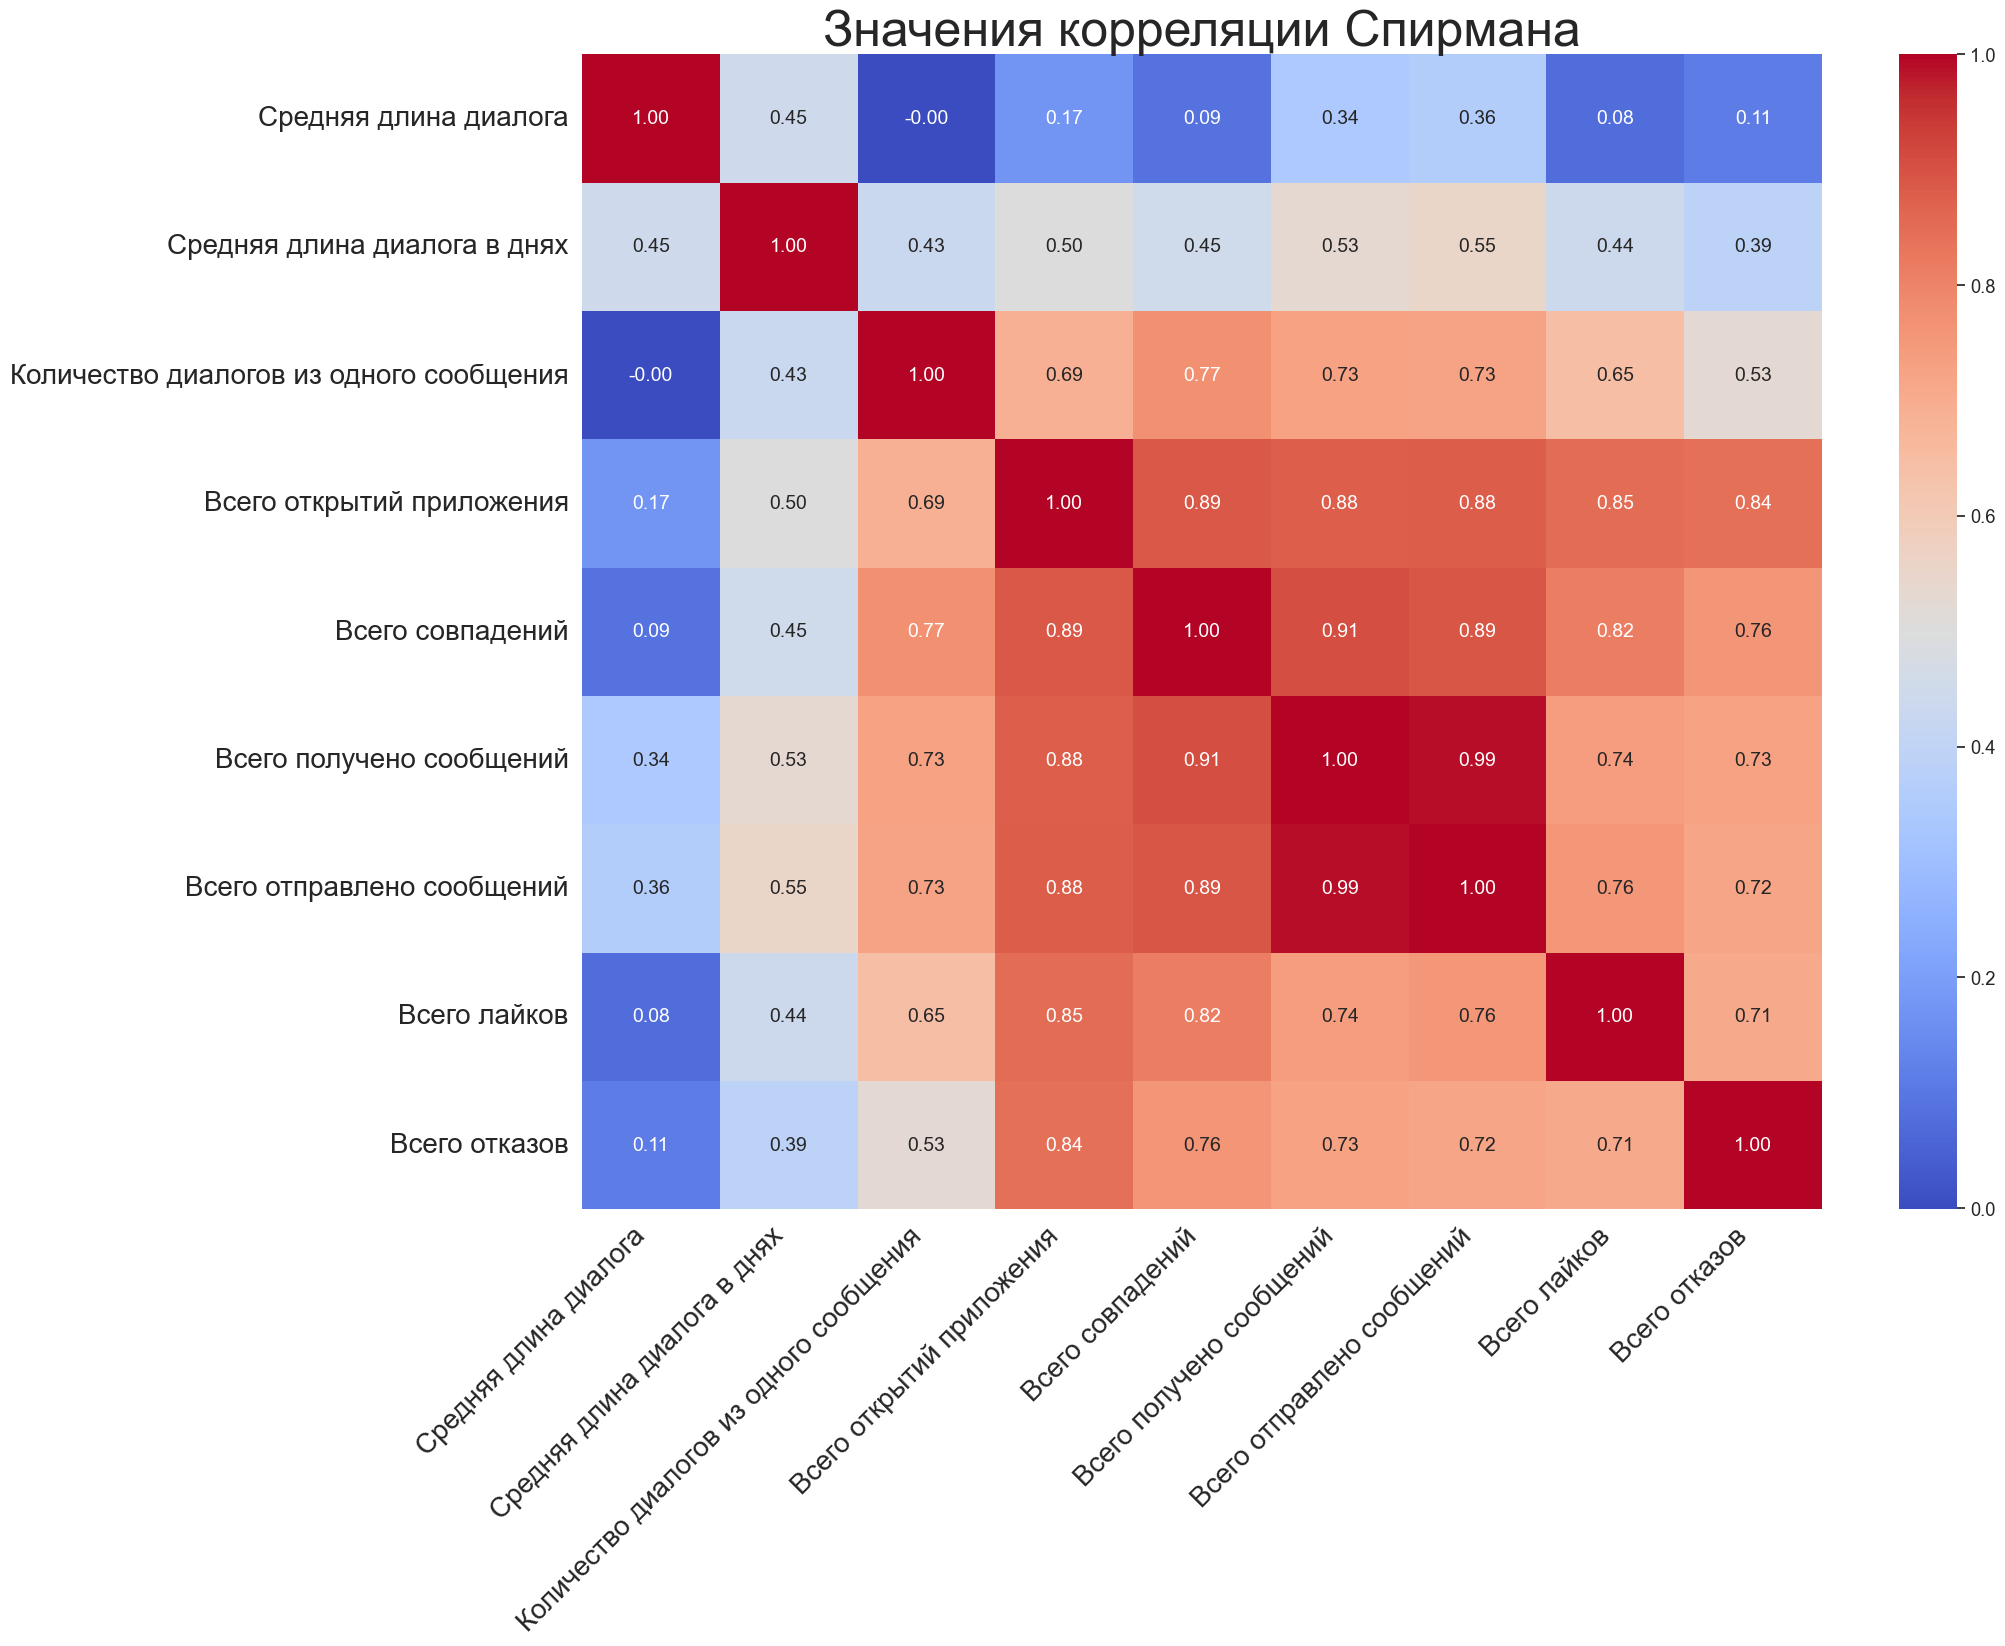

In [20]:
# Наблюдения для презентации

# Создание DataFrame только с выбранными колонками
selected_columns = ['conversationsMeta.averageConversationLength',
           'conversationsMeta.averageConversationLengthInDays',
           'conversationsMeta.nrOfOneMessageConversations',
           'Total_appOpens',
           'Total_matches',
           'Total_messagesReceived',
           'Total_messagesSent',
           'Total_swipeLikes',
           'Total_swipePasses']

data_selected = data[selected_columns]

# Вычисление матрицы корреляций Пирсона и Спирмана
pearson_corr = data_selected.corr(method='pearson')
spearman_corr = data_selected.corr(method='spearman')

# Вычисление p-values для корреляций Пирсона и Спирмана
def calculate_corr_values(df, method):
    corr_values = pd.DataFrame(index=df.columns, columns=df.columns)
    for col in df.columns:
        for row in df.columns:
            if method == 'pearson':
                p, _ = pearsonr(df[col], df[row])
            else:
                p, _ = spearmanr(df[col], df[row])
            corr_values.at[col, row] = p
    return corr_values.astype(float)

pearson_corr_values = calculate_corr_values(data_selected, 'pearson')
spearman_corr_values = calculate_corr_values(data_selected, 'spearman')

# Переименование колонок в DataFrame значений корреляциии для лучшего восприятия
pearson_corr_values = pearson_corr_values.rename(columns=column_translations, index=column_translations)
spearman_corr_values = spearman_corr_values.rename(columns=column_translations, index=column_translations)


# Функция для отображения тепловой карты значений корреляции
def plot_heatmap(df, title):
    plt.figure(figsize=(20, 15))
    sns.set_theme(font_scale=1.2)
    sns.heatmap(df, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, annot_kws={"size": 14} )
    plt.title(title, fontsize=36)
    plt.yticks(fontsize=20)
    plt.xticks(rotation=45, ha="right", fontsize=20)
    plt.show()

# Отображение тепловых карт значений корреляции
plot_heatmap(pearson_corr_values, "Значения корреляции Пирсона")
plot_heatmap(spearman_corr_values, "Значения корреляции Спирмана")


## Проверка гипотез

### Активность мужчин и женщин

Проверим гипотезу (как нулевую) "мужчины ставят в среднем столько же лайков в день, сколько женщины" с альтернативной гипотезой "мужчины ставят больше лайков в день".

In [21]:
# Фильтрация данных по полу и количеству совпадений
male_data = data[data['user.gender'] == 'M']['Total_swipeLikes'] / data[data['user.gender'] == 'M']['DaysWith_swipeLikes']
female_data = data[data['user.gender'] == 'F']['Total_swipeLikes'] / data[data['user.gender'] == 'F']['DaysWith_swipeLikes']

# Выполнение t-теста
u_statistic, p_value = stats.mannwhitneyu(male_data.dropna(), female_data.dropna(), alternative='greater')

# Вывод результатов
print("U-статистика:", u_statistic)
print("P-value:", p_value)


U-статистика: 93932.0
P-value: 8.342593996026769e-38


p-value значительно меньше 0.05, что указывает на отсутствие статистически значимых различий между двумя группами. Нужно принять нулевую гипотезу, что мужчины ставят в среднем столько же лайков в день, сколько женщины.

##### **Вывод**: Мужчины и женщины ставят лайки одинаково активно.

### Соц сети и сообещения

Проверим гипотезу (как нулевую) "наличие подключённых социальных сетей не влияет на количество получаемых сообщений" с альтернативной гипотезой "при подключении соц сетей количество получаемых сообщений увеличивается".

In [22]:
has_instagram = data['Total_messagesReceived'][data['user.instagram'] == True]
no_instagram = data['Total_messagesReceived'][data['user.instagram'] == False]

# Поскольку данные распределены не нормально, используем непараметрический тест (Mann-Whitney U test)
# для сравнения двух независимых выборок
u_statistic, p_value = stats.mannwhitneyu(has_instagram, no_instagram, alternative='greater')

# Вывод результатов
print("U-статистика:", u_statistic)
print("P-value:", p_value)

U-статистика: 154572.5
P-value: 4.3860767732388725e-09


p-value значительно меньше 0.05, что указывает на статистически значимые различия между двумя группами. Это позволяет отвергнуть нулевую гипотезу о том, что количества полученных сообщений для пользователей с подключенным аккаунтом Instagram и без него равны.

##### **Вывод**: Наличие подключенного аккаунта Instagram увеличивает количество полученных сообщений.

In [23]:
has_spotify = data['Total_messagesReceived'][data['user.spotify'] == True]
no_spotify = data['Total_messagesReceived'][data['user.spotify'] == False]

# Поскольку данные распределены не нормально, используем непараметрический тест (Mann-Whitney U test)
# для сравнения двух независимых выборок
u_statistic, p_value = stats.mannwhitneyu(has_spotify, no_spotify, alternative='greater')

# Вывод результатов
print("U-статистика:", u_statistic)
print("P-value:", p_value)

U-статистика: 183546.5
P-value: 0.02057653559935015


P-значение меньше 0.05, что указывает на статистическую значимость различий между двумя группами. Это позволяет отвергнуть нулевую гипотезу о том, что количества полученных сообщений для пользователей с подключенным Spotify и без него равны.

##### **Вывод**: Наличие подключенного аккаунта Spotify статистически значимо увеличивает количество полученных сообщений.

Стоит отметить, что на уровне значимости 0.01 нулевую гипотезу стоило бы принять, в отличии от предыдущего случая.

### Соц сети и мэтчи

Проверим гипотезу (как нулевую) "наличие подключённых социальных сетей не влияет на количество совпадений" с альтернативной гипотезой "при подключении соц сетей количество совпадений увеличивается".

In [24]:
has_instagram = data['Total_matches'][data['user.instagram'] == True]
no_instagram = data['Total_matches'][data['user.instagram'] == False]

# Поскольку данные распределены не нормально, используем непараметрический тест (Mann-Whitney U test)
# для сравнения двух независимых выборок
u_statistic, p_value = stats.mannwhitneyu(has_instagram, no_instagram, alternative='greater')

# Вывод результатов
print("U-статистика:", u_statistic)
print("P-value:", p_value)

U-статистика: 154790.0
P-value: 3.567092370516528e-09


In [25]:
has_spotify = data['Total_matches'][data['user.spotify'] == True]
no_spotify = data['Total_matches'][data['user.spotify'] == False]

# Поскольку данные распределены не нормально, используем непараметрический тест (Mann-Whitney U test)
# для сравнения двух независимых выборок
u_statistic, p_value = stats.mannwhitneyu(has_spotify, no_spotify, alternative='greater')

# Вывод результатов
print("U-статистика:", u_statistic)
print("P-value:", p_value)

U-статистика: 187985.0
P-value: 0.0025810873880907103


Результаты аналогичны предыдущим.
##### **Вывод**: Наличие подключенных аккаунтов Instagram (Spotify) статистически значимо увеличивает количество совпадений.

### Знак зодиака и популярность

Проверим нулевую гипотезу "Знак зодиака не влияет а количество полученных сообщений"

In [27]:
# Группировка данных по знаку зодиака пользователя и сбор сообщений для непараметрического анализа
zodiac_groups = data.groupby('user.zodiacSign')['Total_messagesReceived'].apply(list)

# Проведение теста Краскела-Уоллиса, который является непараметрическим методом для проверки, происходят ли выборки
# из одного распределения. Используется для сравнения двух или более независимых выборок одинакового или разного размера.
h_statistic, p_value = stats.kruskal(*zodiac_groups)

h_statistic, p_value


(7.826742300896642, 0.7287348457169307)

p-value составляет 0.729, что значительно больше 0.05. Это указывает на то, что нет статистически значимых различий между группами по знакам зодиака в количестве полученных сообщений. 
##### **Вывод**: знак зодиака пользователя не влияет на количество полученных сообщений.

Проверим нулевую гипотезу "Знак зодиака не влияет а количество мэтчей"

In [26]:
zodiac_groups = data.groupby('user.zodiacSign')['Total_matches'].apply(list)

h_statistic, p_value = stats.kruskal(*zodiac_groups)

h_statistic, p_value


(6.108783074669716, 0.8660081330115663)

##### **Вывод**: знак зодиака пользователя не влияет на количество мэтчей.